In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


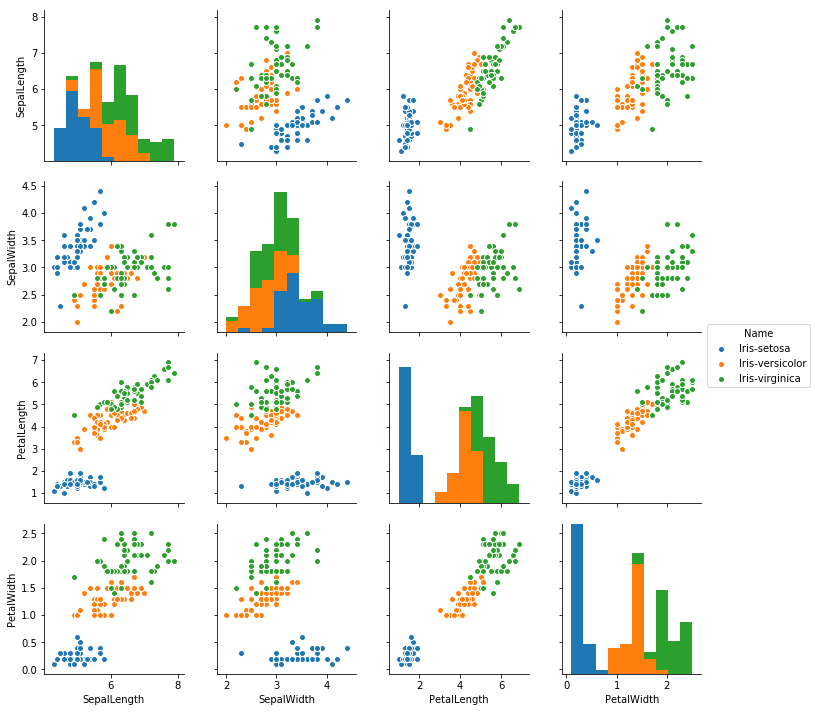

In [8]:
sns.pairplot(df,hue='Name')

In [9]:
df['Name'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [11]:
df = df[df['Name']!='Iris-virginica']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64

# Outlier Check

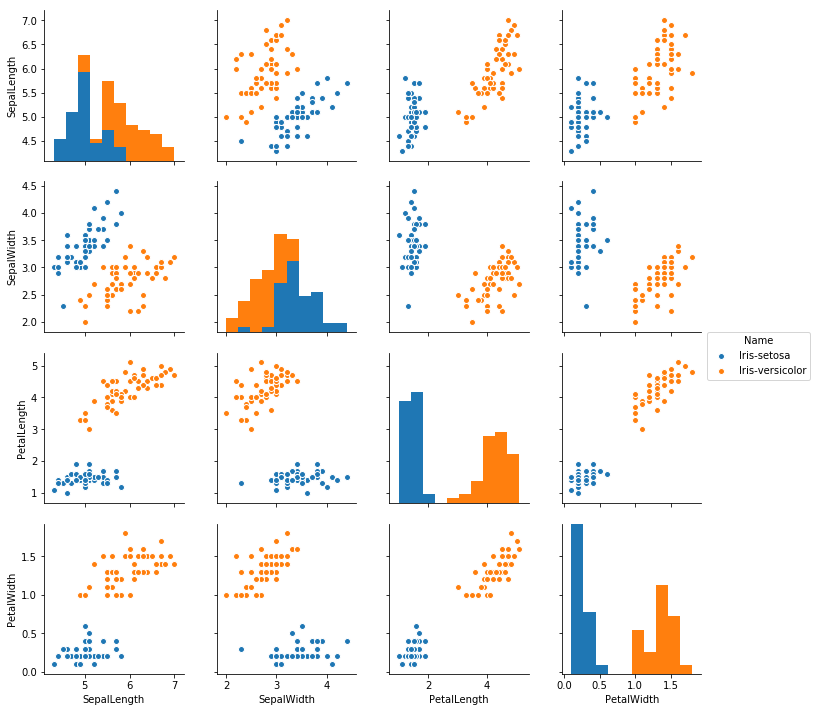

In [13]:
sns.pairplot(df,hue='Name')

From the above plot we can see that  there are no outliers. To confirm let's plot them seperately

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E774436780>]],
      dtype=object)

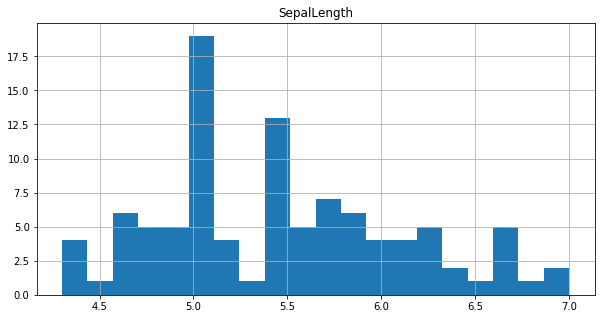

In [21]:
df.hist(column='SepalLength',bins=20,figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E774462A58>]],
      dtype=object)

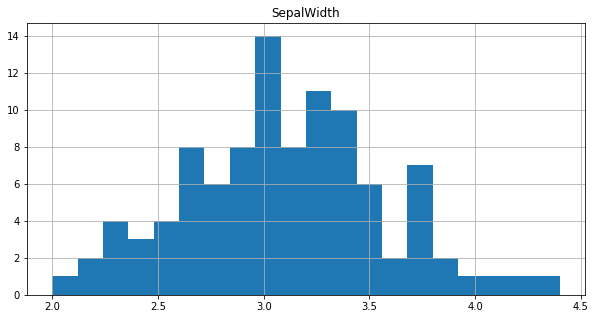

In [22]:
df.hist(column='SepalWidth',bins=20,figsize=(10,5))

# Label Encoding

In [23]:
df['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64

In [24]:
df['Name'].replace(['Iris-setosa','Iris-versicolor'],[1,0],inplace=True)

C:\Users\IamChamp\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
df['Name'].value_counts()

1    50
0    50
Name: Name, dtype: int64

# Model Construction

In [41]:
inp_df = df.drop(columns='Name')
#
out_df = df['Name']

In [42]:
inp_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
out_df.head()

0    1
1    1
2    1
3    1
4    1
Name: Name, dtype: int64

In [89]:

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#inp_df
X_train,X_test,y_train,y_test = train_test_split(inp_df,out_df,test_size=0.1,random_state=42)

In [90]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [91]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (90, 4)
Output Shape (10, 4)


In [92]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [93]:

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [94]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [95]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [96]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [97]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightIntialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_function(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_function(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.13999044  0.1281543  -0.18500632 -0.1826209 ]]
Optimized intercept -0.004146050800898362
Training Accuracy 0.4888888888888889
Test Accuracy 0.6


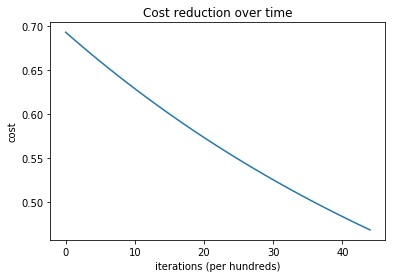

In [88]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()